In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns


In [92]:
datasets = ["BAC"]


for dataset in datasets:
    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start="2008-01-01", end="2008-12-31")
    filename = f"{dataset}_data.csv"
    data.to_csv(filename)
    print(f"Download data for {dataset} and saved as {filename}")

Download data for BAC and saved as BAC_data.csv


In [94]:
Ticker = 'BAC'
start_date = '2008-01-01'
end_date = '2008-12-31'
data = yf.download(Ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [96]:
Ticker = 'BAC'
start_date = '2008-01-01'
end_date = '2008-12-31'

In [97]:
stock_data = yf.download(Ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [98]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,41.529999,41.549999,40.349998,40.560001,30.612654,30764600
2008-01-03,40.630001,40.810001,40.250000,40.299999,30.416414,22589500
2008-01-04,40.000000,40.290001,39.759998,39.849998,30.076769,34921700
2008-01-07,40.049999,40.240002,39.259998,39.900002,30.114519,31884400
2008-01-08,40.180000,40.209999,38.279999,38.410000,28.989939,42143300


In [99]:
stock_data['Returns'] = stock_data['Adj Close'].pct_change()

In [100]:
stock_data.dropna()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2008-01-03,40.630001,40.810001,40.250000,40.299999,30.416414,22589500,-0.006410
2008-01-04,40.000000,40.290001,39.759998,39.849998,30.076769,34921700,-0.011167
2008-01-07,40.049999,40.240002,39.259998,39.900002,30.114519,31884400,0.001255
2008-01-08,40.180000,40.209999,38.279999,38.410000,28.989939,42143300,-0.037343
2008-01-09,38.380001,38.790001,37.419998,38.740002,29.239019,44276900,0.008592
...,...,...,...,...,...,...,...
2008-12-23,13.430000,13.580000,12.720000,12.750000,10.407563,68454600,-0.057650
2008-12-24,12.750000,13.560000,12.740000,13.530000,11.044264,38022300,0.061177
2008-12-26,13.660000,13.800000,13.290000,13.360000,10.905498,43646200,-0.012565


In [101]:
annual_volatility = stock_data['Returns'].std() * np.sqrt(252)

In [102]:
print(f"Annualized Volatility: {annual_volatility:.2%}")

Annualized Volatility: 100.18%


In [103]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2008-12-23,13.43,13.58,12.72,12.75,10.407563,68454600,-0.057650
2008-12-24,12.75,13.56,12.74,13.53,11.044264,38022300,0.061177
2008-12-26,13.66,13.80,13.29,13.36,10.905498,43646200,-0.012565
2008-12-29,13.57,13.73,12.68,12.94,10.562659,62741300,-0.031437
2008-12-30,13.09,13.24,12.66,13.24,10.807544,72897800,0.023184


In [104]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2008-01-02,41.529999,41.549999,40.349998,40.560001,30.612654,30764600,NaN
2008-01-03,40.630001,40.810001,40.250000,40.299999,30.416414,22589500,-0.006410
2008-01-04,40.000000,40.290001,39.759998,39.849998,30.076769,34921700,-0.011167
2008-01-07,40.049999,40.240002,39.259998,39.900002,30.114519,31884400,0.001255
2008-01-08,40.180000,40.209999,38.279999,38.410000,28.989939,42143300,-0.037343
...,...,...,...,...,...,...,...
2008-12-23,13.430000,13.580000,12.720000,12.750000,10.407563,68454600,-0.057650
2008-12-24,12.750000,13.560000,12.740000,13.530000,11.044264,38022300,0.061177
2008-12-26,13.660000,13.800000,13.290000,13.360000,10.905498,43646200,-0.012565


In [105]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,251.000000
mean,30.932143,31.766111,29.976587,30.822976,23.918577,7.849461e+07,-0.002160
std,8.830412,8.816645,8.892713,8.887459,6.522486,4.905570e+07,0.063108
min,12.080000,12.160000,10.010000,11.250000,8.978647,2.258950e+07,-0.262260
25%,23.965000,24.577501,22.925000,23.817500,18.938965,4.235788e+07,-0.031519
50%,32.744999,33.885000,31.830000,32.930000,25.814154,6.315340e+07,-0.006410
75%,38.165001,38.825000,37.419998,37.915000,29.096530,9.986840e+07,0.020589
max,44.750000,45.080002,44.070000,45.029999,33.986393,3.227277e+08,0.272014


In [106]:
SO = 28.67
K = 28.98
T = 1
r = 0.02
sigma = 1


In [107]:
n_simulations = 10000
n_steps =252


In [108]:
np.random.seed(0)
z = np.random.standard_normal((n_simulations , n_steps))

In [109]:
dt = T / n_steps
S = SO * np.exp(np.cumsum(( r  - 0.5 * sigma **2) * dt + sigma * np.sqrt(dt) * z, axis=1))

In [110]:
call_payoffs = np.maximum(S[:, -1] - K, 0)
put_payoffs = np.maximum(K - S[:, -1], 0)


In [111]:
call_option_price = np.exp(-r * T) * np.mean(call_payoffs)
put_option_price = np.exp(-r * T) * np.mean(put_payoffs)

In [112]:
print(f"European Call Option Price: {call_option_price:.2f}")
print(f"European Put Option Price: {put_option_price:.2f}")

European Call Option Price: 10.67
European Put Option Price: 10.75


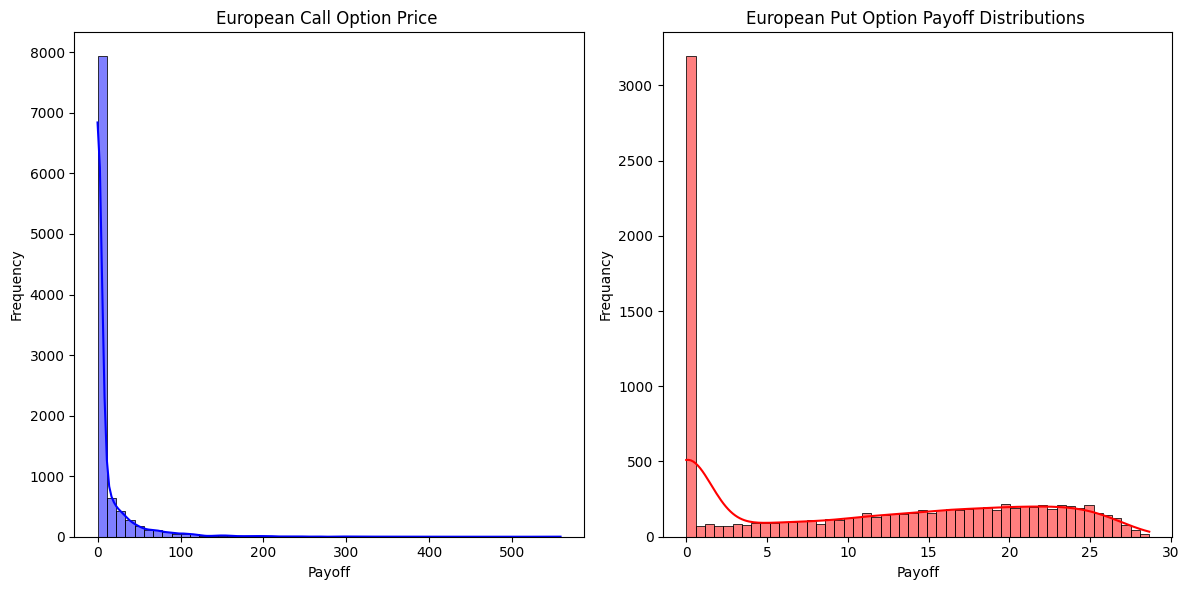

In [113]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.histplot(call_payoffs, bins=50, color='blue', kde=True)
plt.title('European Call Option Price ')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(122)
sns.histplot(put_payoffs, bins=50, color='red', kde=True)
plt.title('European Put Option Payoff Distributions ')
plt.xlabel("Payoff")
plt.ylabel('Frequancy')
plt.tight_layout()
plt.show()